In [92]:
# Load the library
import nsepy as nse
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py 
import cufflinks as cff
from numpy import sqrt,log
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow

In [2]:
symbol1="tcs"
nse_rel1=nse.get_history(symbol1,start=date(2012,11,1),end=date(2022,11,1))

88

In [ ]:
nse_rel1.to_csv("tcs_data1.csv")

## TCS DATA

In [3]:
df=pd.read_csv("tcs_data1.csv")

In [4]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2012-11-01,TCS,EQ,1315.50,1314.9,1320.35,1310.20,1314.50,1315.25,1315.08,789884,1.038764e+14,23921,622171,0.7877
1,2012-11-02,TCS,EQ,1315.25,1324.9,1338.00,1318.40,1329.00,1331.20,1330.55,836987,1.113656e+14,27175,515345,0.6157
2,2012-11-05,TCS,EQ,1331.20,1335.9,1343.35,1325.30,1328.70,1329.60,1334.48,611913,8.165833e+13,30214,305731,0.4996
3,2012-11-06,TCS,EQ,1329.60,1325.0,1337.40,1319.45,1320.00,1320.55,1325.89,648733,8.601456e+13,27560,445808,0.6872
4,2012-11-07,TCS,EQ,1320.55,1325.0,1333.35,1321.50,1332.95,1331.50,1329.38,529195,7.035024e+13,29016,309772,0.5854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2022-10-24,TCS,EQ,3137.40,3170.1,3178.00,3155.00,3155.00,3161.70,3166.78,260949,8.263686e+13,25561,147148,0.5639
2469,2022-10-25,TCS,EQ,3161.70,3180.5,3184.25,3151.15,3160.15,3162.10,3166.20,2069643,6.552904e+14,99745,1453555,0.7023
2470,2022-10-27,TCS,EQ,3162.10,3160.7,3174.00,3134.35,3162.05,3157.40,3161.23,2438421,7.708421e+14,130001,1750099,0.7177
2471,2022-10-28,TCS,EQ,3157.40,3150.0,3178.50,3145.00,3161.10,3163.25,3164.30,1355739,4.289958e+14,71311,720453,0.7650


In [5]:
#data structure
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(2473, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2473 non-null   object 
 1   Symbol              2473 non-null   object 
 2   Series              2473 non-null   object 
 3   Prev Close          2473 non-null   float64
 4   Open                2473 non-null   float64
 5   High                2473 non-null   float64
 6   Low                 2473 non-null   float64
 7   Last                2473 non-null   float64
 8   Close               2473 non-null   float64
 9   VWAP                2473 non-null   float64
 10  Volume              2473 non-null   int64  
 11  Turnover            2473 non-null   float64
 12  Trades              2473 non-null   int64  
 13  Deliverable Volume  2473 non-null   int64  
 14  %Deliverble         2473 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 289.9+

In [7]:
#data type
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [8]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
# Removing missing values

df.drop(['Symbol','Deliverable Volume','%Deliverble','Series','Prev Close','Last','VWAP','Turnover','Trades'],axis=1,inplace=True)

In [10]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2012-11-01,1314.90,1320.35,1310.20,1315.25,789884
1,2012-11-02,1324.90,1338.00,1318.40,1331.20,836987
2,2012-11-05,1335.90,1343.35,1325.30,1329.60,611913
3,2012-11-06,1325.00,1337.40,1319.45,1320.55,648733
4,2012-11-07,1325.00,1333.35,1321.50,1331.50,529195
5,2012-11-08,1324.00,1334.70,1316.60,1331.20,619522
6,2012-11-09,1330.00,1333.25,1320.90,1324.95,355691
7,2012-11-12,1320.00,1348.00,1320.00,1334.50,733391
8,2012-11-13,1335.15,1337.20,1322.05,1325.30,71507
9,2012-11-15,1320.10,1322.00,1291.00,1294.15,867701


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03
mean,2470.633421,2496.077173,2443.768763,2469.686474,2.053472e+06
std,577.805564,581.649268,572.922283,577.048869,1.827578e+06
min,1214.700000,1225.000000,1197.000000,1205.500000,2.801700e+04
25%,2100.000000,2125.000000,2075.000000,2100.950000,9.648440e+05
50%,2428.800000,2449.000000,2406.000000,2429.050000,1.608785e+06
75%,2700.000000,2726.900000,2670.100000,2701.300000,2.609483e+06
max,4033.950000,4043.000000,3980.000000,4019.150000,4.403358e+07


In [13]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999105,0.999162,0.998198,0.058033
High,0.999105,1.000000,0.999070,0.999323,0.067626
Low,0.999162,0.999070,1.000000,0.999263,0.050174
Close,0.998198,0.999323,0.999263,1.000000,0.058367
Volume,0.058033,0.067626,0.050174,0.058367,1.000000


<AxesSubplot:>

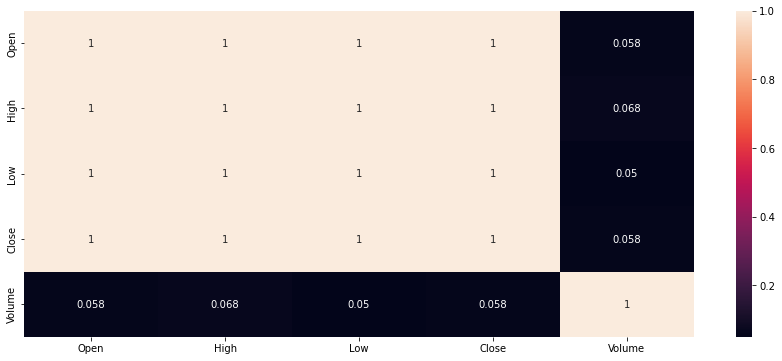

In [14]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

# Opening price of the stock when the market opens

In [15]:
df_open=pd.DataFrame()
df_open["TCS"]=pd.Series(df["Open"])
df_open["Date"]=pd.Series(df["Date"])

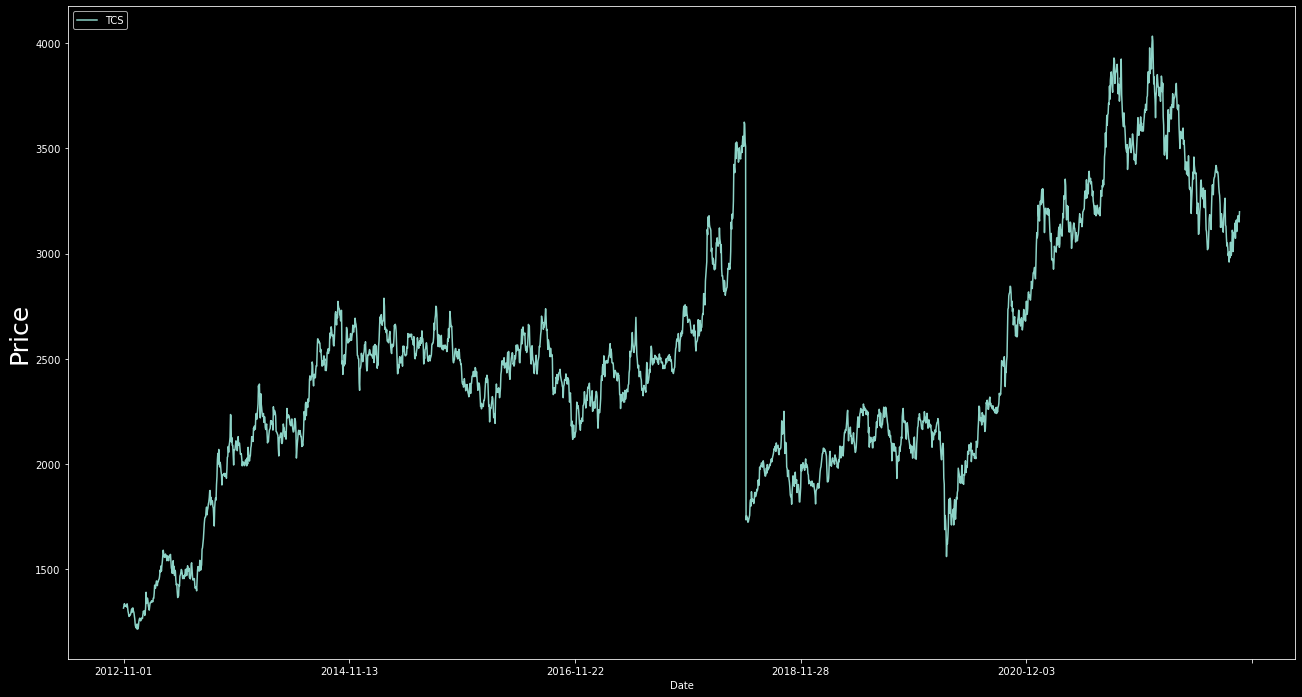

In [16]:
plt.style.use("dark_background")
plt.rcParams["figure.figsize"]=(22,12)
df_open.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

## Closing price of the stock when the market closed

In [17]:
df_close=pd.DataFrame()
df_close["TCS"]=pd.Series(df["Close"])
df_close["Date"]=pd.Series(df["Date"])

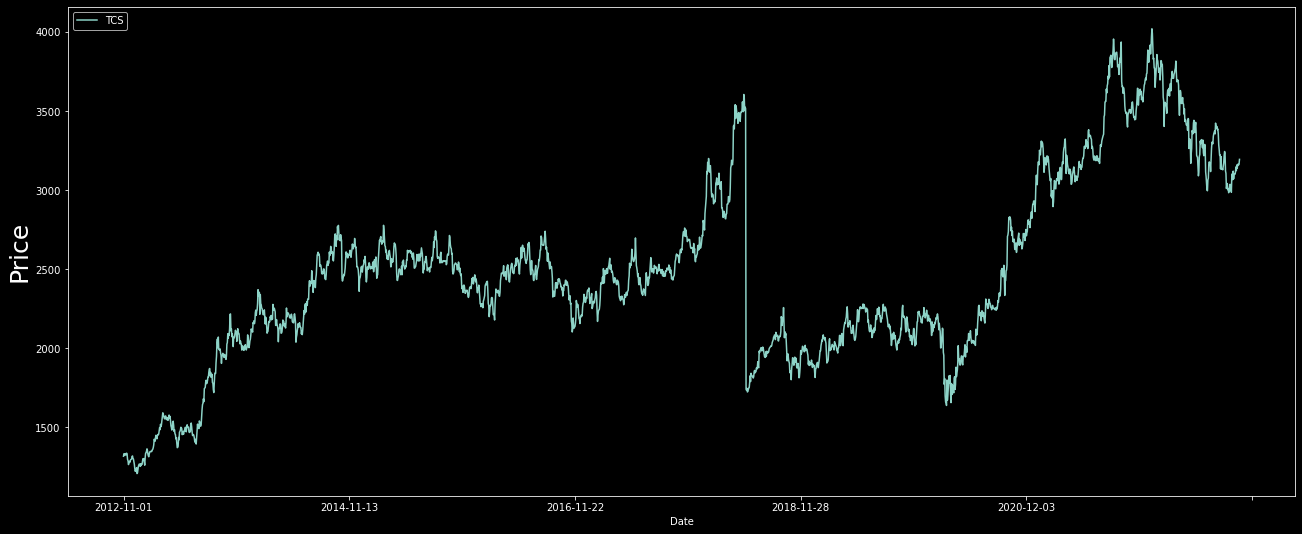

In [18]:
plt.rcParams["figure.figsize"]=(22,9)
df_close.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

# Total amount of stock traded on that day

In [19]:
df_volume=pd.DataFrame()
df_volume["TCS"]=pd.Series(df["Volume"])
df_volume["Date"]=pd.Series(df["Date"])

Text(0, 0.5, 'Count')

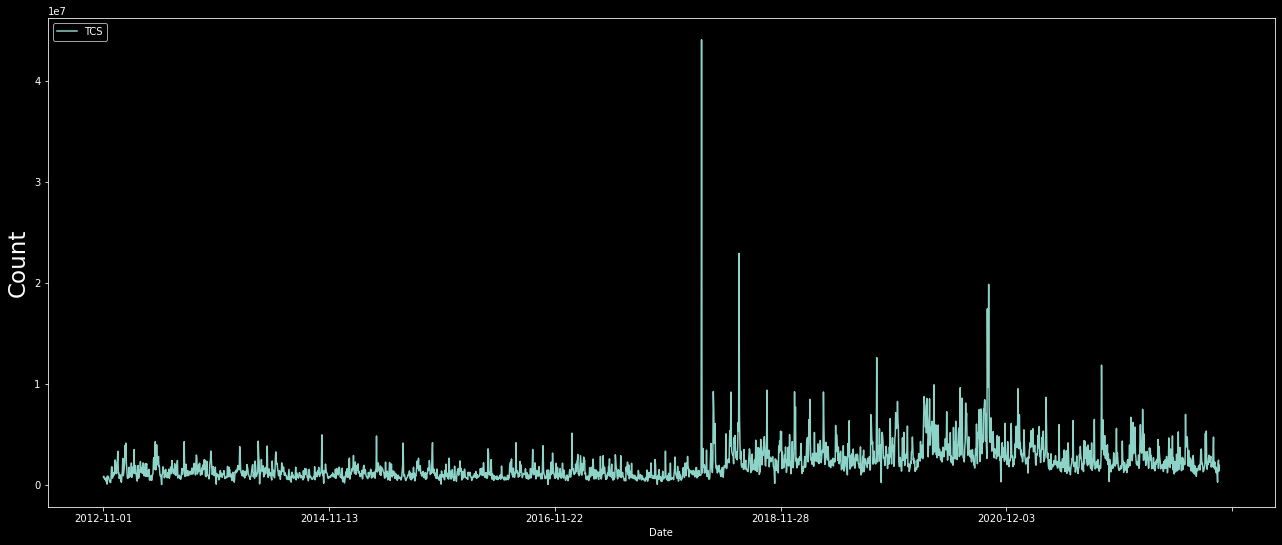

In [20]:
# Volume 

df_volume.plot(x="Date")
plt.legend(loc="upper left")
plt.ylabel("Count",size=23)

Above plot shows total Amount of Stocks traded on a particular day 


## To identify the Trend and Sesonality

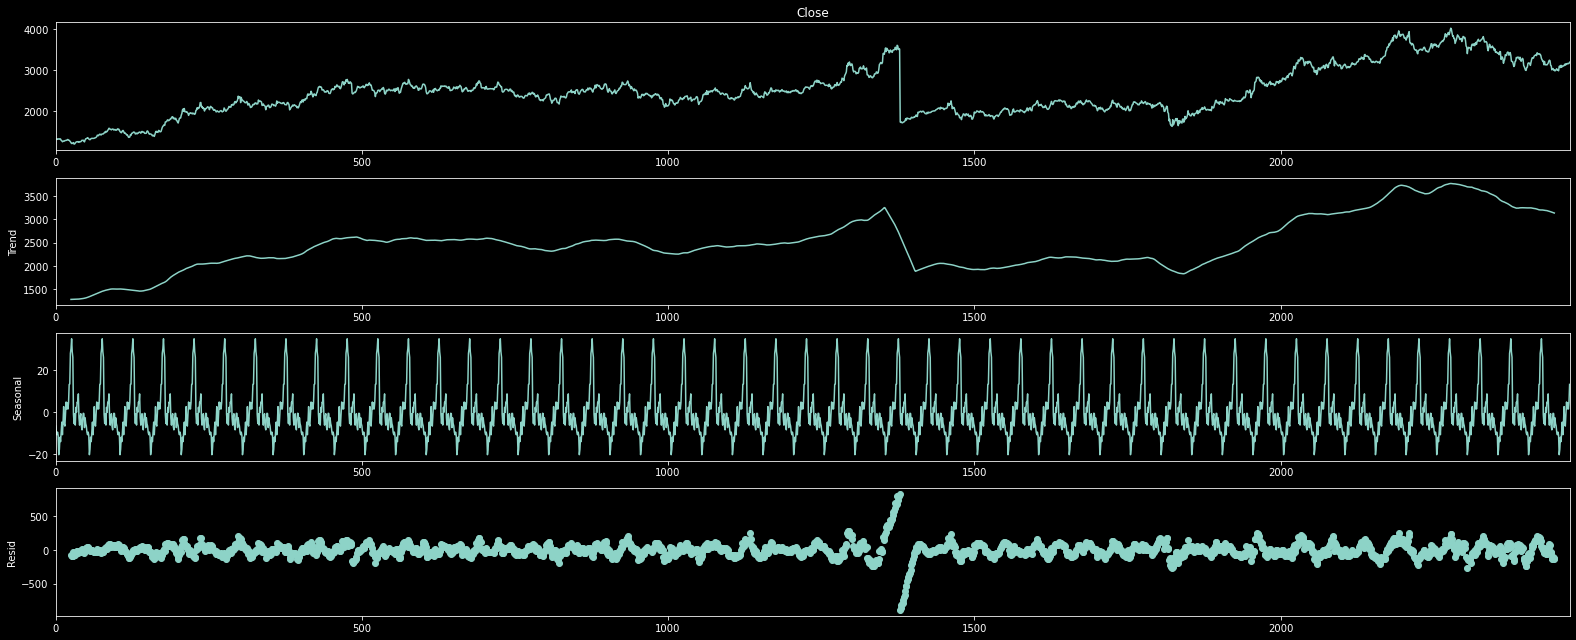

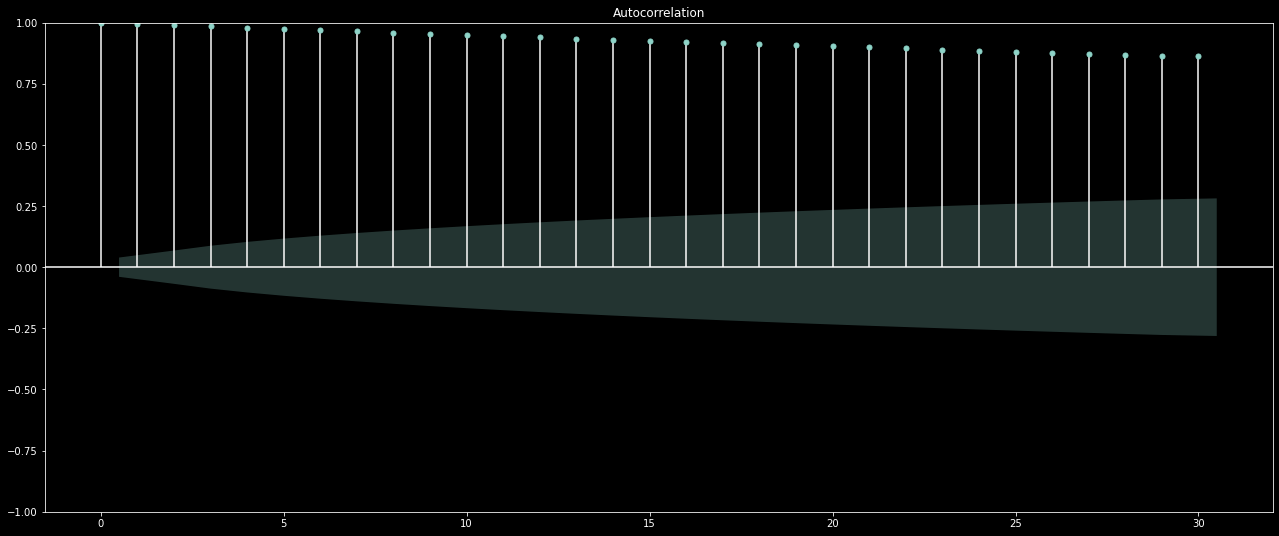

In [21]:
df_seasonal=seasonal_decompose(df.Close,period=50)

df_seasonal.plot()
# ACF Plot - to identify the corrrlation 
plot_acf(df["Close"],lags=30)

plt.show()
plt.rcParams["figure.figsize"]=(12,4)

## Moving average

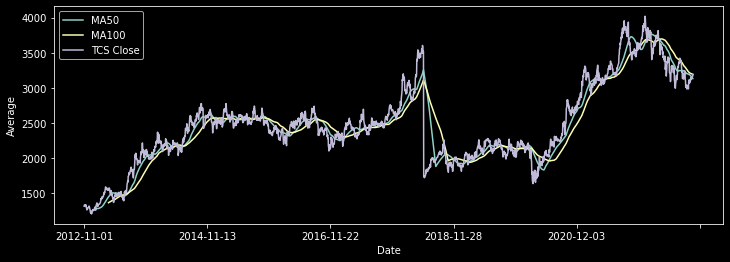

In [22]:
T_MA=pd.DataFrame()
T_MA["50"]=df["Close"].rolling(50).mean()
T_MA["100"]=df["Close"].rolling(100).mean()
T_MA["Date"]=df["Date"]
T_MA["Close"]=df["Close"]
T_MA=T_MA.set_index("Date")
label=["MA50","MA100","TCS Close"]
T_MA.plot()
plt.ylabel("Average")
plt.legend(label,loc="upper left")

* Moving Average is used to easily identify the trend in the market
* Here after 2020 you can see the trend is slightly consistently going up
* Here we have 50 days and 100 days of moving average 


In [23]:
py.offline.init_notebook_mode(connected=True)
cff.go_offline()

## TCS Year wise Average price

In [24]:
df_Quarter=pd.read_csv("tcs_data1.csv",parse_dates=["Date"],index_col="Date")
df_Quarter=df_Quarter.Close.resample('Y').mean()
df_Quarter.iplot(kind="line",color="black")

* TCS has shown its lowest average price on 2010
* TCS has shown its highest average price on 2022

## TCS high prices

In [25]:
df_high=pd.DataFrame()
df_high["TCS"]=df.High
# Making Date as a Index 
df_high["Date"]=df.Date
df_high=df_high.set_index("Date")
df_high.iplot(kind="bar")

## TCS low prices

In [26]:
df_low=pd.DataFrame()
df_low["TCS"]=df.Low
# Making Date as a Index 
df_low["Date"]=df.Date
df_low=df_low.set_index("Date")
df_low.iplot(kind="bar")

In [27]:
plt.style.use("dark_background")

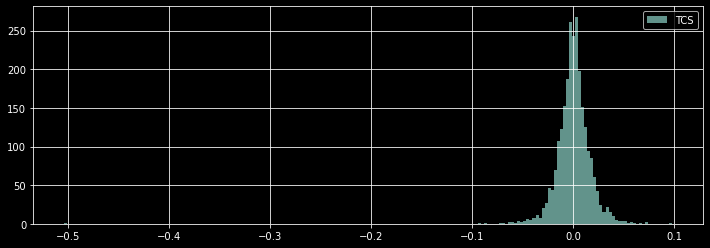

In [28]:
df_volatility=pd.DataFrame()
df_volatility["TCS"]=(df["Close"]/df["Close"].shift(1))-1
df_volatility["TCS"].hist(bins=200,alpha=0.7,label="TCS")
plt.legend()

Volatility in the sense, higher up and down fluctuations


### Maximum Highest Price and Lowest Price

In [29]:
df["High"].max(),df["Low"].max()

(4043.0, 3980.0)

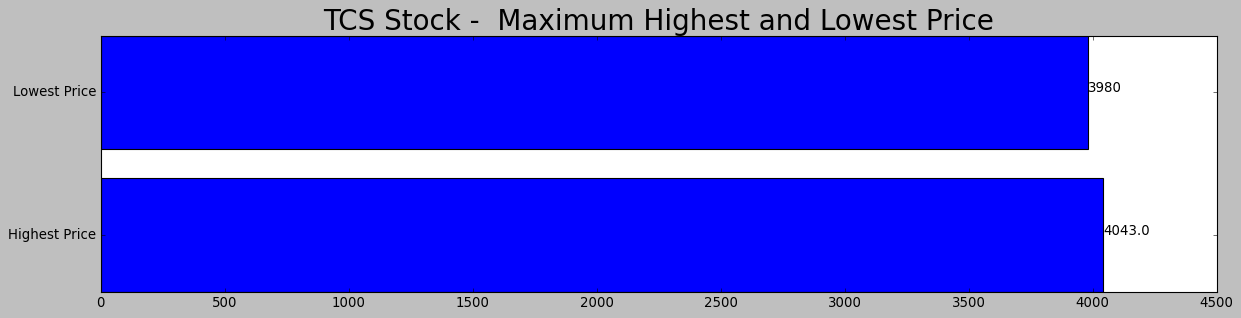

In [30]:
# 2012-11-01 - 2022-11-01
plt.style.use("classic")
plt.rcParams["figure.figsize"]=(18,4)
H_max_x2 = [4043.0,3980]
L_max_y2 = ["Highest Price","Lowest Price"]

plt.barh(L_max_y2,H_max_x2)
plt.title("TCS Stock -  Maximum Highest and Lowest Price",size=25)
 
for index, value in enumerate(H_max_x2):
    plt.text(value, index,
             str(value))

## High vs Low - TCS

In [31]:
plt.style.use("dark_background")
h_l_tcs=pd.DataFrame()
h_l_tcs["tcs_high"]=pd.Series(df.High)
h_l_tcs["tcs_low"]=pd.Series(df.Low)
h_l_tcs["Date"]=df.Date
h_l_tcs=h_l_tcs.set_index(["Date"])
h_l_tcs.iplot(kind="bar",color=["green","lightgreen"])

## Preprossing

In [35]:
df_df=df
df_df

,Date,Open,High,Low,Close,Volume
0,2012-11-01,1314.9,1320.35,1310.20,1315.25,789884
1,2012-11-02,1324.9,1338.00,1318.40,1331.20,836987
2,2012-11-05,1335.9,1343.35,1325.30,1329.60,611913
3,2012-11-06,1325.0,1337.40,1319.45,1320.55,648733
4,2012-11-07,1325.0,1333.35,1321.50,1331.50,529195
...,...,...,...,...,...,...
2468,2022-10-24,3170.1,3178.00,3155.00,3161.70,260949
2469,2022-10-25,3180.5,3184.25,3151.15,3162.10,2069643
2470,2022-10-27,3160.7,3174.00,3134.35,3157.40,2438421
2471,2022-10-28,3150.0,3178.50,3145.00,3163.25,1355739


In [36]:
df_close_sqrt=sqrt(df_df["Close"])
df_close_log=log(df_df["Close"])

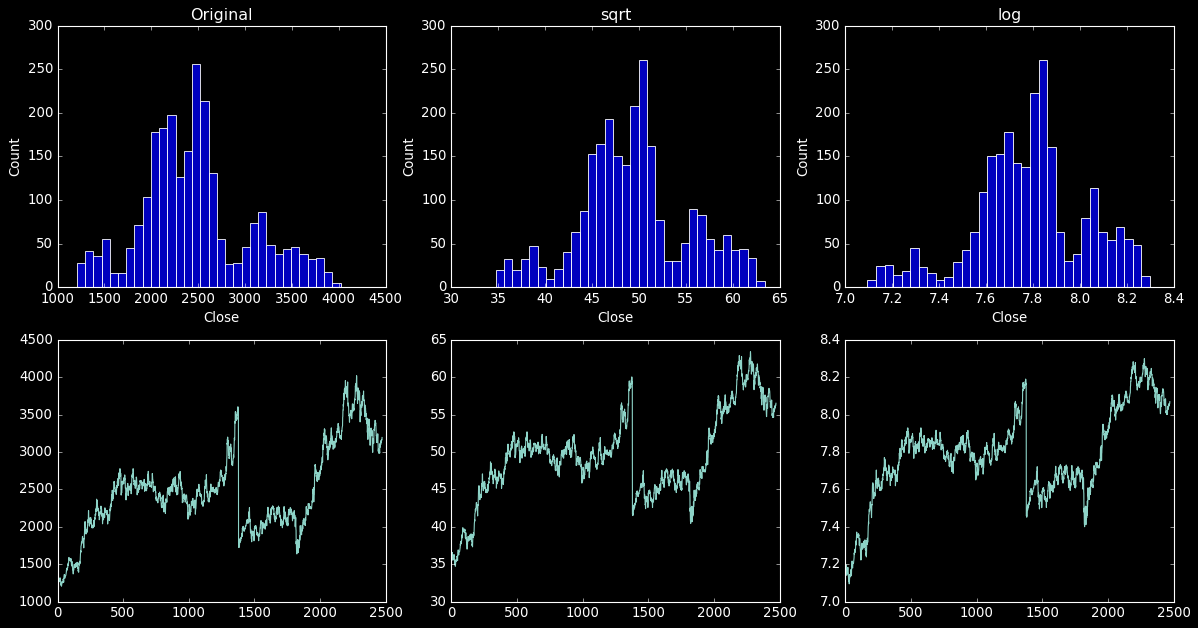

In [127]:
fig,ax=plt.subplots(2,3)
sns.histplot(df["Close"],ax=ax[0,0]) ; ax[0,0].set_title("Original")
#ax[1]=plt.plot(df["Close"])
ax[1,0].plot(df_df.Close)
plt.rcParams["figure.figsize"]=(18,9)
sns.histplot(df_close_sqrt,ax=ax[0,1]) ; ax[0,1].set_title("sqrt")
ax[1,1].plot(df_close_sqrt)
sns.histplot(df_close_log,ax=ax[0,2]) ; ax[0,2].set_title("log")
ax[1,2].plot(df_close_log)

In [44]:
adf=adfuller(df_close_log)
output=pd.Series(adf[0:4],index=["t-value","p-value","no.of.lags","no.of.observations"])
output

t-value                 -2.761137
p-value                  0.064043
no.of.lags               0.000000
no.of.observations    2472.000000
dtype: float64

## Modeling

In [148]:
train=df_close_log.iloc[0:int(len(df_close_log)*.80)]
test=df_close_log.iloc[int(len(df_close_log)*.80):int(len(df_close_log))]

In [147]:
train.shape,test.shape

((1731,), (495,))

In [49]:
# 1.Simple Exponential Smoothing
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=SimpleExpSmoothing(train).fit(smoothing_level=decimals[i])
    preds=model.predict(start=test.index[0],end=test.index[-1])
    best_one.append(mean_absolute_error(preds,test))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.22006847907792423
0.2 : 0.2174498054774357
0.3 : 0.2213708352971549
0.4 : 0.22314319641745795
0.5 : 0.22338827431049582
0.6 : 0.22282606891476806
0.7 : 0.22184092475022318
0.8 : 0.2206539919920848
0.9 : 0.2194106488646995
1.0 : 0.2182008052519583


In [50]:
# 2. Simple Exponential Smoothing
df_model1=SimpleExpSmoothing(train).fit(smoothing_level=1.0)
df_preds1=df_model1.predict(start=test.index[0],end=test.index[-1])
df_error1=mean_absolute_error(df_preds1,test)
df_error1

0.2182008052519583

In [52]:
# 2. Advance Exponential Smoothing ( HOLT )
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=Holt(train).fit(smoothing_level=1.0,smoothing_trend=decimals[i])
    preds=model.predict(start=test.index[0],end=test.index[-1])
    best_one.append(mean_absolute_error(preds,test))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.16510619686672484
0.2 : 0.26635656710344735
0.3 : 0.153550378383052
0.4 : 0.6229057932885554
0.5 : 1.104459785989173
0.6 : 1.552186954679488
0.7 : 1.9521932663063901
0.8 : 2.293619017691573
0.9 : 2.5726715131780384
1.0 : 2.796993481663848


In [56]:
# 2. Advance Exponential Smoothing ( HOLT )
df_model2=Holt(train).fit(smoothing_level=1.0,smoothing_trend=0.1)
df_preds2=df_model2.predict(start=test.index[0],end=test.index[-1])
df_error2=mean_absolute_error(df_preds2,test)
df_error2

0.16510619686672484

In [58]:
# 3. Holt's winter additive trend and aditive sesonality
df_model3=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=12).fit()
df_preds3=df_model3.predict(start=test.index[0],end=test.index[-1])
df_error3=mean_absolute_error(df_preds3,test)
df_error3

0.13439527389740108

In [59]:
# 4. Holt's winter additive trend and multiplicative sesonality
df_model4=ExponentialSmoothing(train,trend="add",seasonal="mul",seasonal_periods=12).fit()
df_preds4=df_model4.predict(start=test.index[0],end=test.index[-1])
df_error4=mean_absolute_error(df_preds4,test)
df_error4

0.13438260577236363

In [62]:
# 6. Auto Regressive
df_model5 = AutoReg(train, lags=10).fit()
print(df_model5.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1978
Model:                    AutoReg(10)   Log Likelihood                4687.920
Method:               Conditional MLE   S.D. of innovations              0.022
Date:                Fri, 18 Nov 2022   AIC                          -9351.840
Time:                        10:50:12   BIC                          -9284.823
Sample:                            10   HQIC                         -9327.213
                                 1978                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0675      0.021      3.242      0.001       0.027       0.108
Close.L1       0.9917      0.023     44.023      0.000       0.948       1.036
Close.L2      -0.0050      0.032     -0.158      0.8

In [129]:
df_preds5 = df_model5.predict(start=len(train), end=2472, dynamic=False)
df_error5=mean_absolute_error(df_preds5,test)
df_error5

0.3227065914583223

In [65]:
test.shape

(495,)

In [149]:
# 6. ARIMA Method
df_model6 = ARIMA(train, order=(3,1,0))
df_model6 = df_model6.fit()
a,b,c=df_model6.forecast(495)
d=pd.Series(a,index=test.index)
df_error6=mean_absolute_error(d,test)
df_error6

ValueError: too many values to unpack (expected 3)

In [150]:
# 8. LSTM

#df_lstm=pd.DataFrame()
#df_lstm["1_day_back_price"]=df_close_log.shift(1)
#df_lstm["2_day_back_price"]=df_close_log.shift(2)
#df_lstm["3_day_back_price"]=df_close_log.shift(3)
#df_lstm["close"]=df_close_log
#df_lstm["Date"]=df_df["Date"]
#df_lstm=df_lstm.set_index(["Date"])
#df_lstm=df_lstm.dropna()
#df_lstm_x=df_lstm.drop(["close"],axis=1)
#df_lstm_y=df_lstm[["close"]]
#df_lstm_close=np.array(df_close_log).reshape(-1,1)

#df_lstm_x=np.array(df_lstm_x).reshape(-1,1)
#df_lstm_y=np.array(df_lstm_y).reshape(-1,1)

#df_lstm_xtrain=df_lstm_x[:1980]
#df_lstm_xtest=df_lstm_x[1980:]
#df_lstm_ytrain=df_lstm_y[:1980]
#df_lstm_ytest=df_lstm_y[1980:]

normalizing=MinMaxScaler(feature_range=(0,1))
df_lstm=normalizing.fit_transform(np.array(df_close_log).reshape(-1,1))


In [85]:
train_data=int(len(df_lstm)*0.80)
test_data=len(df_lstm)-train_data
train_data,test_data

(1978, 495)

In [86]:
df_lstm_train,df_lstm_test=df_lstm[0:train_data,:],df_lstm[train_data:len(df_lstm),:]

In [87]:
len(df_lstm_train),len(df_lstm_test)

(1978, 495)

In [88]:
def create_df(dataset,step):
    xxtrain,yytrain=[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        xxtrain.append(a)
        yytrain.append(dataset[i+step,0])
    return np.array(xxtrain),np.array(yytrain)    

In [89]:
t_s=100
df_lstm_xtrain,df_lstm_ytrain=(create_df(df_lstm_train,t_s))
df_lstm_xtest,df_lstm_ytest=(create_df(df_lstm_test,t_s))

In [90]:
df_lstm_xtrain.shape,df_lstm_ytrain.shape,df_lstm_xtest.shape,df_lstm_ytest.shape

((1877, 100), (1877,), (394, 100), (394,))

In [94]:
n_features=1
df_lstm_xtrain=df_lstm_xtrain.reshape(df_lstm_xtrain.shape[0],df_lstm_xtrain.shape[1],n_features)
df_lstm_xtest=df_lstm_xtest.reshape(df_lstm_xtest.shape[0],df_lstm_xtest.shape[1],n_features)

In [95]:
df_model7 = Sequential()
df_model7.add(LSTM(50,return_sequences=True,input_shape=(df_lstm_xtrain.shape[1],1)))
df_model7.add(LSTM(50,return_sequences=True))
df_model7.add(LSTM(50))
df_model7.add(Dense(1,activation='linear')) 
df_model7.compile(optimizer="adam",loss="MAE")
df_model7.fit(df_lstm_xtrain,df_lstm_ytrain,validation_data=(df_lstm_xtest,df_lstm_ytest),epochs=10,batch_size=64)

Epoch 1/10
30/30 [==============================] - 26s 377ms/step - loss: 0.1294 - val_loss: 0.0767
Epoch 2/10
30/30 [==============================] - 9s 290ms/step - loss: 0.0359 - val_loss: 0.0314
Epoch 3/10
30/30 [==============================] - 7s 240ms/step - loss: 0.0307 - val_loss: 0.0264
Epoch 4/10
30/30 [==============================] - 5s 174ms/step - loss: 0.0312 - val_loss: 0.0248
Epoch 5/10
30/30 [==============================] - 9s 288ms/step - loss: 0.0276 - val_loss: 0.0225
Epoch 6/10
30/30 [==============================] - 5s 166ms/step - loss: 0.0271 - val_loss: 0.0247
Epoch 7/10
30/30 [==============================] - 7s 244ms/step - loss: 0.0261 - val_loss: 0.0195
Epoch 8/10
30/30 [==============================] - 7s 217ms/step - loss: 0.0251 - val_loss: 0.0327
Epoch 9/10
30/30 [==============================] - 5s 183ms/step - loss: 0.0235 - val_loss: 0.0182
Epoch 10/10
30/30 [==============================] - 8s 279ms/step - loss: 0.0247 - val_loss: 0.019

In [100]:
df_preds7=df_model7.predict(df_lstm_xtest)
df_error7=mean_absolute_error(df_preds7,df_lstm_ytest)
df_error7

13/13 [==============================] - 4s 68ms/step


0.019478833226010416

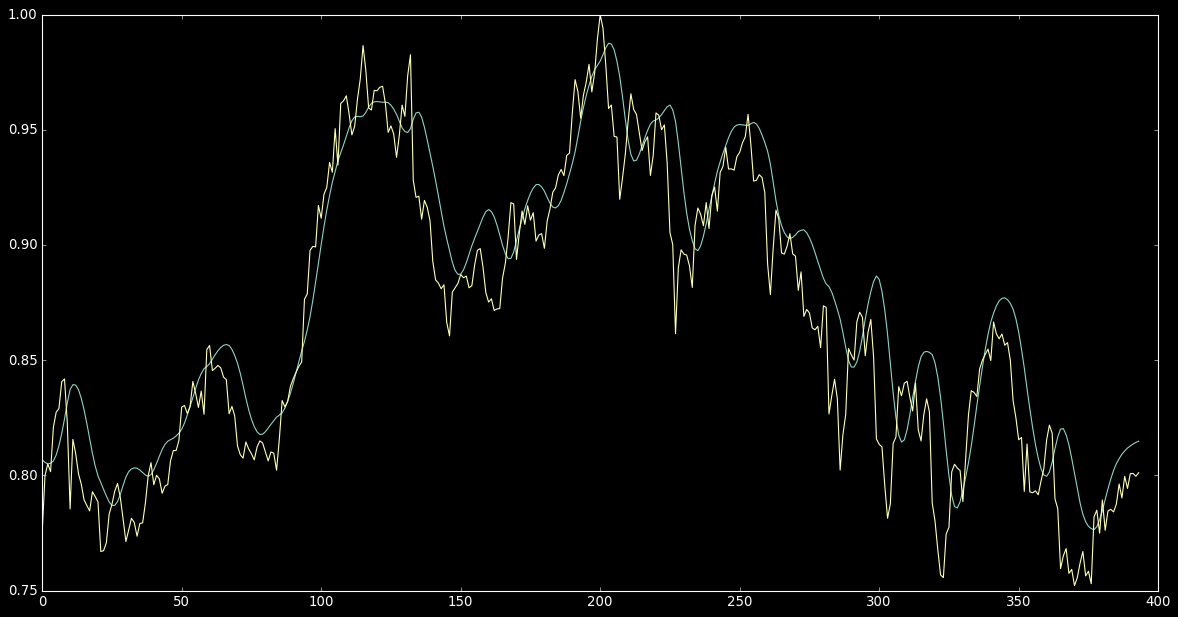

In [101]:
plt.plot(df_preds7)
plt.plot(df_lstm_ytest)

In [102]:
df_lstm_ytest.shape

(394,)

In [103]:
fut_inp=df_lstm_ytest[294:]
fut_inp=fut_inp.reshape(1,-1)

In [104]:
temp_inp=list(fut_inp)
fut_inp.shape

(1, 100)

In [105]:
#n=int(input("Enter the number"))
lst_out=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp)>100):
        fut_inp=np.array(temp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df_model7.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        temp_inp=temp_inp[1:]
        lst_out.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df_model7.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i=i+1
               
    print(lst_out) 

[[0.815177857875824]]
[[0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.

[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824]]
[[0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.815177857875824], [0.81517785

In [109]:
np.exp(normalizing.inverse_transform(lst_out))

array([[3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729],
       [3217.20202729]])

In [110]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

In [111]:
df_lstm.shape,len(lst_out)

((2473, 1), 30)

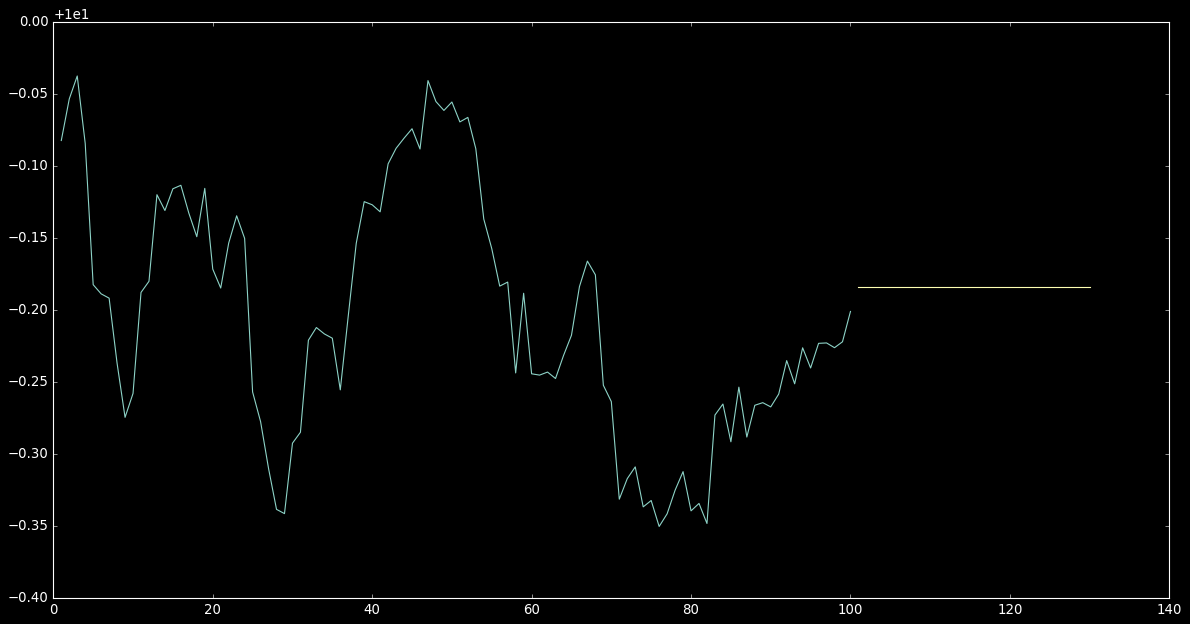

In [114]:
plt.plot(plot_new,normalizing.inverse_transform(np.exp(df_lstm[2373:])))
plt.plot(plot_pred,normalizing.inverse_transform(np.exp(lst_out)))

59/59 [==============================] - 4s 67ms/step


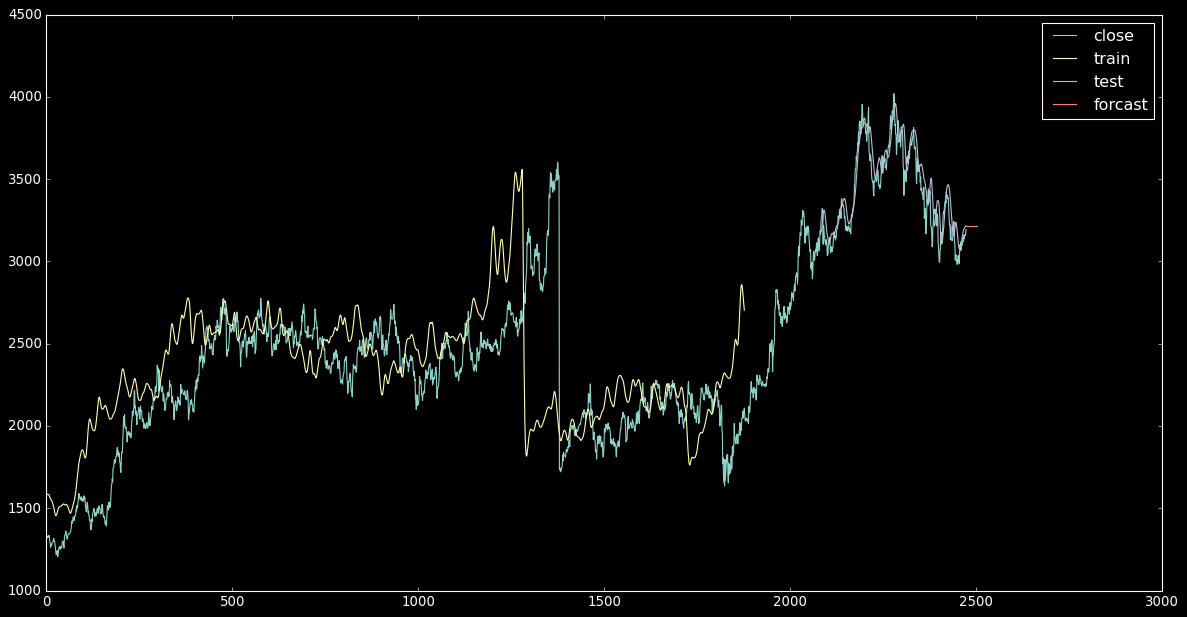

In [116]:
ranges1=np.arange(2079,2473)
ranges2=np.arange(2473,2503)
t1=np.exp(normalizing.inverse_transform(df_lstm))
t2=np.exp(normalizing.inverse_transform(df_model7.predict(df_lstm_xtrain)))
t3=np.exp(normalizing.inverse_transform(df_preds7))
t4=np.exp(normalizing.inverse_transform(lst_out))
plt.plot(t1)
plt.plot(t2)
plt.plot(ranges1,t3)
plt.plot(ranges2,t4)
label=["close","train","test","forcast"]
plt.legend(label)

In [119]:
df_models=dict()
df_models["SES"]=1-df_error1
df_models["AES (HOLT'S)"]=1-df_error2
df_models["AES add(trend,sesonal)"]=1-df_error3
df_models["AES add(trend),mul(sesonal)"]=1-df_error4
df_models["AutoRegressive"]=1-df_error5

df_models["LSTM"]=1-df_error7

In [120]:
df_models=pd.DataFrame(list(df_models.items()),columns=["Model","Accuracy"])
df_models

,Model,Accuracy
0,SES,0.781799
1,AES (HOLT'S),0.834894
2,"AES add(trend,sesonal)",0.865605
3,"AES add(trend),mul(sesonal)",0.865617
4,AutoRegressive,0.677293
5,LSTM,0.980521


In [121]:
df_models=df_models.sort_values("Accuracy",ascending=False)
df_models

,Model,Accuracy
5,LSTM,0.980521
3,"AES add(trend),mul(sesonal)",0.865617
2,"AES add(trend,sesonal)",0.865605
1,AES (HOLT'S),0.834894
0,SES,0.781799
4,AutoRegressive,0.677293


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

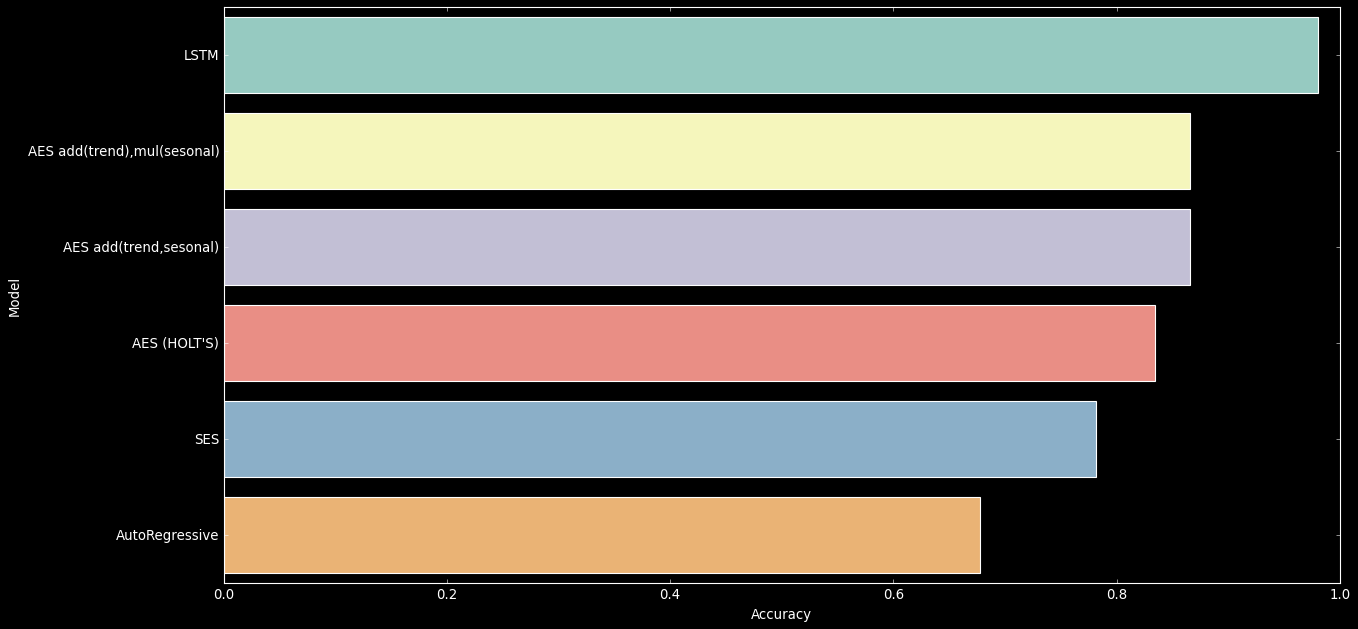

In [124]:

sns.barplot(x="Accuracy",y="Model",data=df_models)